### Εργασία 3

#### Αναγνώριση Προτύπων

##### Κωτούλας Εμμανουήλ 9697

Αρχικά εισάγονται οι απαραίτητες βιβλιοθήκες της python ώστε να χρησιμοποιηθεί ο decision tree classifier και το iris dataset

In [186]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.utils import resample
from collections import Counter

Το σπλιτ δεν γίνεται με κάποιον τυχαίο τρόπο  
Από κάθε 50αδα τα πρώτα 25 είναι για το train και τα δεύτερα 25 για το test  
Τα randomstate έχουν οριστεί σε μια αυθέρετη τιμή 5 ώστε να είναι παρόμοια κάθε φορά τα αποτελέσματα   
Για το resampling χρησιμοποιήθηκε η συνάρτηση resample από το scikit-learn
Δοκίμασα να ορίσω μια διαφορετική τιμή για το random state του resampler για κάθε δέντρο του forest όμως δεν το κράτησα επειδή τα αποτελέσματα ήταν περίεργα


In [187]:
iris = load_iris() #εισάγωνται τα δεδομένα απο το iris

X = iris.data[:, :2]  # μόνο τα πρώτα δύο χαρακτηριστικα
y = iris.target 


Xtrain = np.vstack((X[:25],X[50:75],X[100:125])) # αποθηκεύονται για train τα πρωτα 25 απο καθε 50 
Ytrain = np.hstack((y[:25],y[50:75],y[100:125])) 


Xtest = np.vstack((X[25:50],X[75:100],X[125:150])) # και τα  υπόλοιπα 25 για τεστ
Ytest = np.hstack((y[25:50],y[75:100],y[125:150]))


## Μέρος Α

In [188]:
bestDepth = 1 # αρχικοποίηση καλύτερου βάθους και καλύτερου accuracy
bestAccuracy = 0

for i in range(1,15):
    clf = DecisionTreeClassifier(max_depth=i, random_state= 5) # ορίζεται ο classifier με μέγιστο βάθος i 

    clf.fit(Xtrain,Ytrain)  # και γίνεται trained με τα δεδομένα 

    Ypred = clf.predict(Xtest) # καλείται ένα prediction για τα test data 

    accu = accuracy_score(Ytest, Ypred) # και βρίσκεται το accuracy

    if accu > bestAccuracy : # αν το accuracy είναι μεγαλύτερο από το προηγούμενο καλύτερο ->
        bestAccuracy = accu # αποθηκεύεται η τιμή του και το βάθος στο οποίο επιτεύχθηκε
        bestDepth = i

    print(i, accu, bestAccuracy)
# τέλος τυπώνεται το καλύτερο accuracy και το αντίστοιχο βάθος στο οποίο επιτέυχθηκε
print("Best accuracy = " + str(bestAccuracy) + " at depth " + str(bestDepth))



1 0.64 0.64
2 0.68 0.68
3 0.6933333333333334 0.6933333333333334
4 0.8 0.8
5 0.8 0.8
6 0.8 0.8
7 0.68 0.8
8 0.7066666666666667 0.8
9 0.68 0.8
10 0.72 0.8
11 0.72 0.8
12 0.72 0.8
13 0.72 0.8
14 0.72 0.8
Best accuracy = 0.8 at depth 4


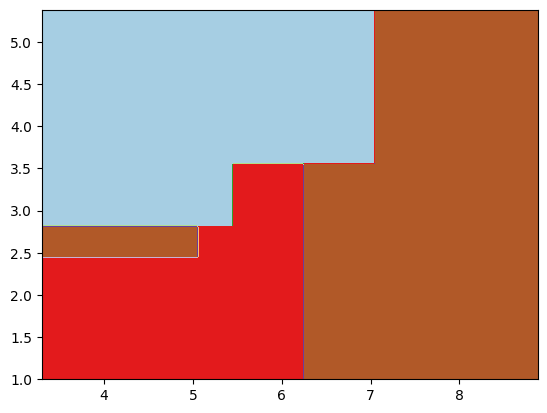

In [189]:
# Για το καλύτερο βα΄θος bestDepth ορίζεται ξανά ο κλασσιφιερ και 

clf = DecisionTreeClassifier(max_depth=bestDepth, random_state=5)
clf.fit(Xtrain,Ytrain)

# ορίζονται κάποια linear δεδομένα ώστε να γίνει το πλοτ για τις περιοχές απόφασης

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),np.arange(y_min, y_max, 0.02))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

## Μέρος Β

In [190]:
# συνάρτηση που βρίσκει το σύμβολο με τις περισσότερες εμφαν΄ισεις μέσα σε μια λίστα
def most_frequent(List):
    occurence_count = Counter(List)
    return occurence_count.most_common(1)[0][0]

# συνάρτηση που υλοποιεί το bootstrapped tree
# Κάνει train ολα τα δέντρα κάνοντας resample κάθε φορά με έναν τυχαίο τρόπο
# στο τέλος βγάζει αποτέλεσμα ανάλογα με την πλειοψηφία
def bootstrappedTree(X, y, XtestB ,depth, percentage):
    # αρχικοποι΄ήσει πίνακα για τις προβλέψεις
    y_preds = []

    for i in range(100):
        # resampling όσων στοιχείων ορίζονται από το γ
        x_sampled, y_sampled = resample( X, y, n_samples = int(len(X)*percentage) )
        # ορισμός του classifier
        clf = DecisionTreeClassifier(max_depth= depth, random_state=9)
        # training στα sampled δεδομένα
        clf.fit(x_sampled, y_sampled)

        # αποθήκευση των δεδομένων
        if i == 0 :
            y_preds =  clf.predict(XtestB)
        else:
            y_preds = np.vstack(( y_preds, clf.predict(XtestB)))

    # πίνακας για τις τελικές προβλέψεις
    y_finalPred = []

    # αλλαγή αξόνων των predictions ώστε κάθε γραμμή να έχει όλα τα predictions από τα δέντρα για ένα στοιχείο
    y_preds = np.swapaxes(y_preds,0,1)

    # τελική δημιουργία της πρόβλεψης ανάλογα με την πλειοψηφία
    for i in range(len(XtestB)):
        y_finalPred.append(most_frequent(y_preds[i]))

    return y_finalPred


In [191]:
# όπως και πιο πάνω για γ = 0.5 σκανάρονται όλα τα βάθη για να βρεθεί το καλύτερο 
bestDepthBoot = 1
bestAccuracy = 0

for i in range(1,20):
    y_preds = bootstrappedTree(Xtrain, Ytrain, Xtest, i, 0.5)
    accuBoot = accuracy_score(Ytest, y_preds)
    if accuBoot > bestAccuracy :
        bestAccuracy = accuBoot
        bestDepthBoot = i
    print(accuBoot,i)


print("best accuracy = " + str(bestAccuracy) + " at depth " + str(bestDepthBoot))

0.6 1
0.7466666666666667 2
0.76 3
0.7333333333333333 4
0.76 5
0.72 6
0.7466666666666667 7
0.7066666666666667 8
0.7333333333333333 9
0.7466666666666667 10
0.7066666666666667 11
0.72 12
0.72 13
0.6933333333333334 14
0.7066666666666667 15
0.7466666666666667 16
0.76 17
0.7333333333333333 18
0.76 19
best accuracy = 0.76 at depth 3


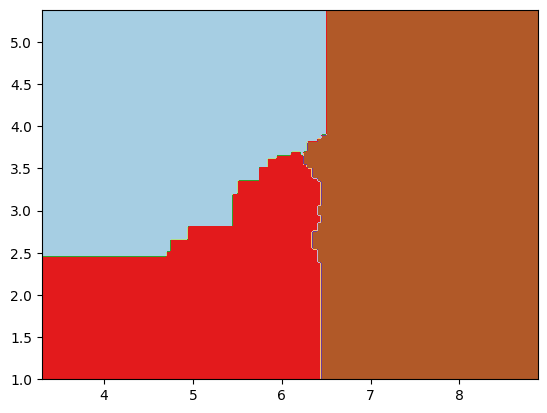

In [192]:
# όπως και πριν δημιουργούνται dummy δεδομένα ώστε να αποτυπωθούν σωστά τα όρια 

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),np.arange(y_min, y_max, 0.02))

Z = bootstrappedTree(Xtrain, Ytrain, np.c_[xx.ravel(), yy.ravel()], bestDepthBoot, 0.5 )
Z = np.reshape(Z,xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

Συγκριτικά με τον πρώτο ταξινομητή ο δεύτερος έχει πολύ πιο περίπλοκα όρια παρότι τα δέντρα του έχουν βάθος μόλις 2
Επίσης φαίνεται να έχει χαμηλότερο accuracy από το 1 ωστόσο έχω παρατηρήσει (όπως θα φανεί και παρακάτω) ότι βρίσκω μεγαλύτερο accuracy  
με μικρότερο γ απο 50% με καλά αποτελέσματα με 20%

In [193]:
# τέλος καλε΄ίται μια μεγάλη λούπα με διάφορες τιμ΄ες του γ ώστε να βρεθεί ο καλύτερος συνδιασμός

bestDepthGamma = 1
bestAccuracyGamma = 0
bestGamma = 0

j = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
for gamma in j :
    for i in range(1,20):
        y_preds = bootstrappedTree(Xtrain, Ytrain, Xtest, i, gamma)
        accuBoot = accuracy_score(Ytest, y_preds)
        if accuBoot > bestAccuracyGamma :
            bestAccuracyGamma = accuBoot
            bestDepthGamma = i
            bestGamma = gamma


print("best accuracy = " + str(bestAccuracyGamma) + " at depth " + str(bestDepthGamma) + " at gamma " + str(bestGamma))

best accuracy = 0.84 at depth 6 at gamma 0.2
